In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import yfinance as yf

data = yf.download("AAPL", start="2010-01-01", end="2024-12-31")
data.to_csv("AAPL_stock_data.csv")


/tmp/ipykernel_11481/3805928910.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2010-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.418382,6.433078,6.369497,6.400987,493729600
2010-01-05,6.429479,6.465768,6.395589,6.436077,601904800
2010-01-06,6.327209,6.454971,6.320611,6.429478,552160000
2010-01-07,6.315512,6.358100,6.269626,6.350602,477131200
2010-01-08,6.357502,6.358102,6.269929,6.307117,447610800


In [4]:
data.shape

(3773, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3773 non-null   float64
 1   (High, AAPL)    3773 non-null   float64
 2   (Low, AAPL)     3773 non-null   float64
 3   (Open, AAPL)    3773 non-null   float64
 4   (Volume, AAPL)  3773 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


In [6]:
data.describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,67.243348,67.895073,66.521444,67.186811,2.299696e+08
std,65.320571,65.927285,64.623759,65.240373,2.180792e+08
min,5.759780,5.878245,5.705795,5.769377,2.323470e+07
25%,17.401426,17.579160,17.256851,17.402003,8.492380e+07
50%,35.164116,35.579204,34.842785,35.216410,1.405608e+08
75%,126.455177,127.539123,124.212889,125.760309,3.081512e+08
max,257.853760,258.928914,256.470034,257.027510,1.880998e+09


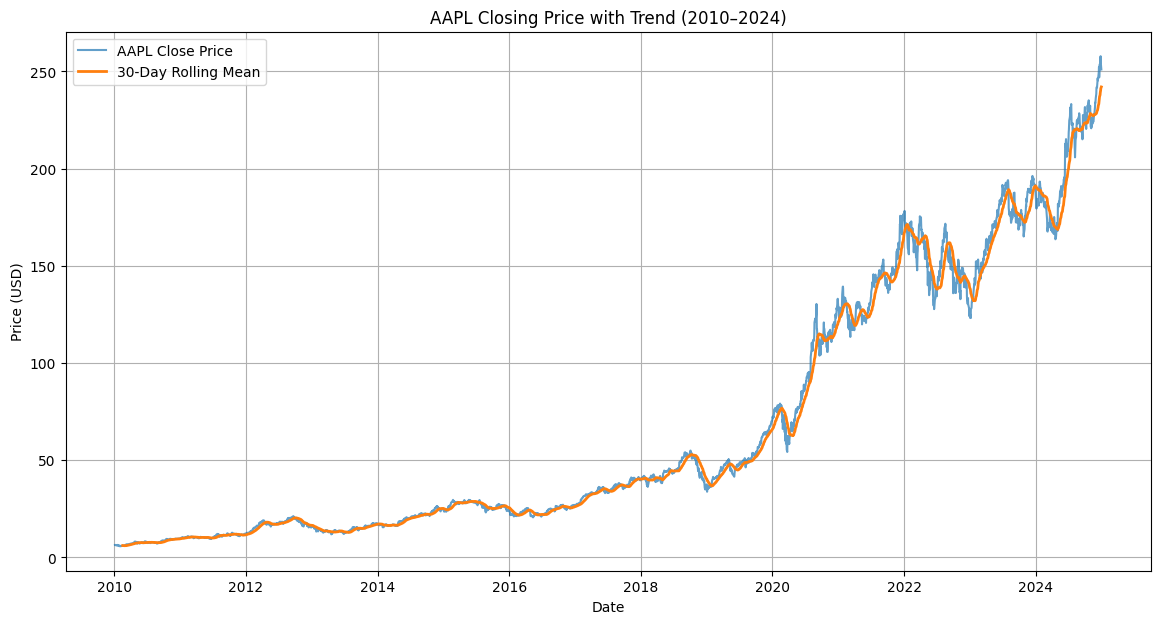

In [12]:
plt.figure(figsize=(14, 7))

plt.plot(data.index, data['Close'], label='AAPL Close Price', alpha=0.7)

plt.plot(
    data.index,
    data['Close'].rolling(window=30).mean(),
    label='30-Day Rolling Mean',
    linewidth=2
)

plt.title('AAPL Closing Price with Trend (2010–2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


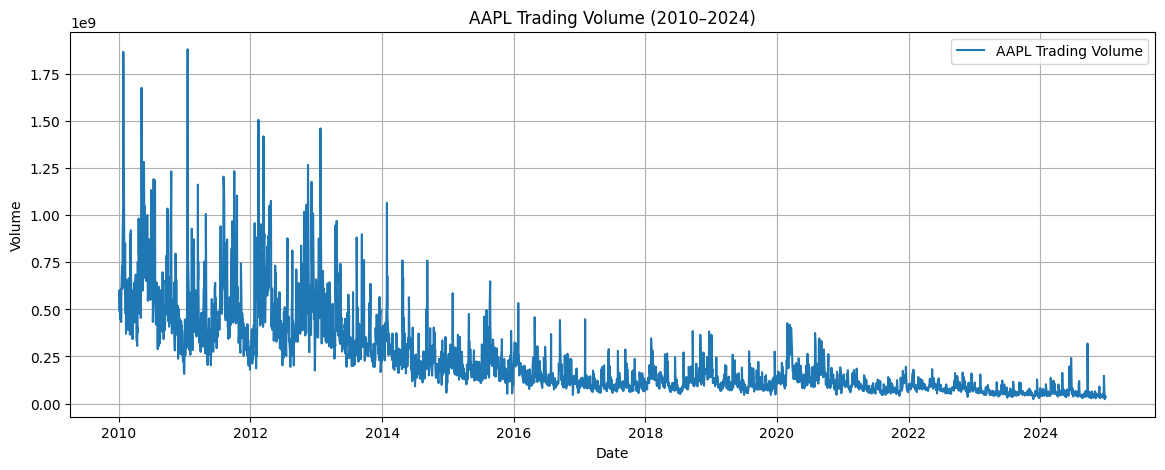

In [13]:
plt.figure(figsize=(14, 5))

plt.plot(data.index, data['Volume'], label='AAPL Trading Volume')

plt.title('AAPL Trading Volume (2010–2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt


In [16]:
stl = STL(data['Close'], period=252)
result = stl.fit()


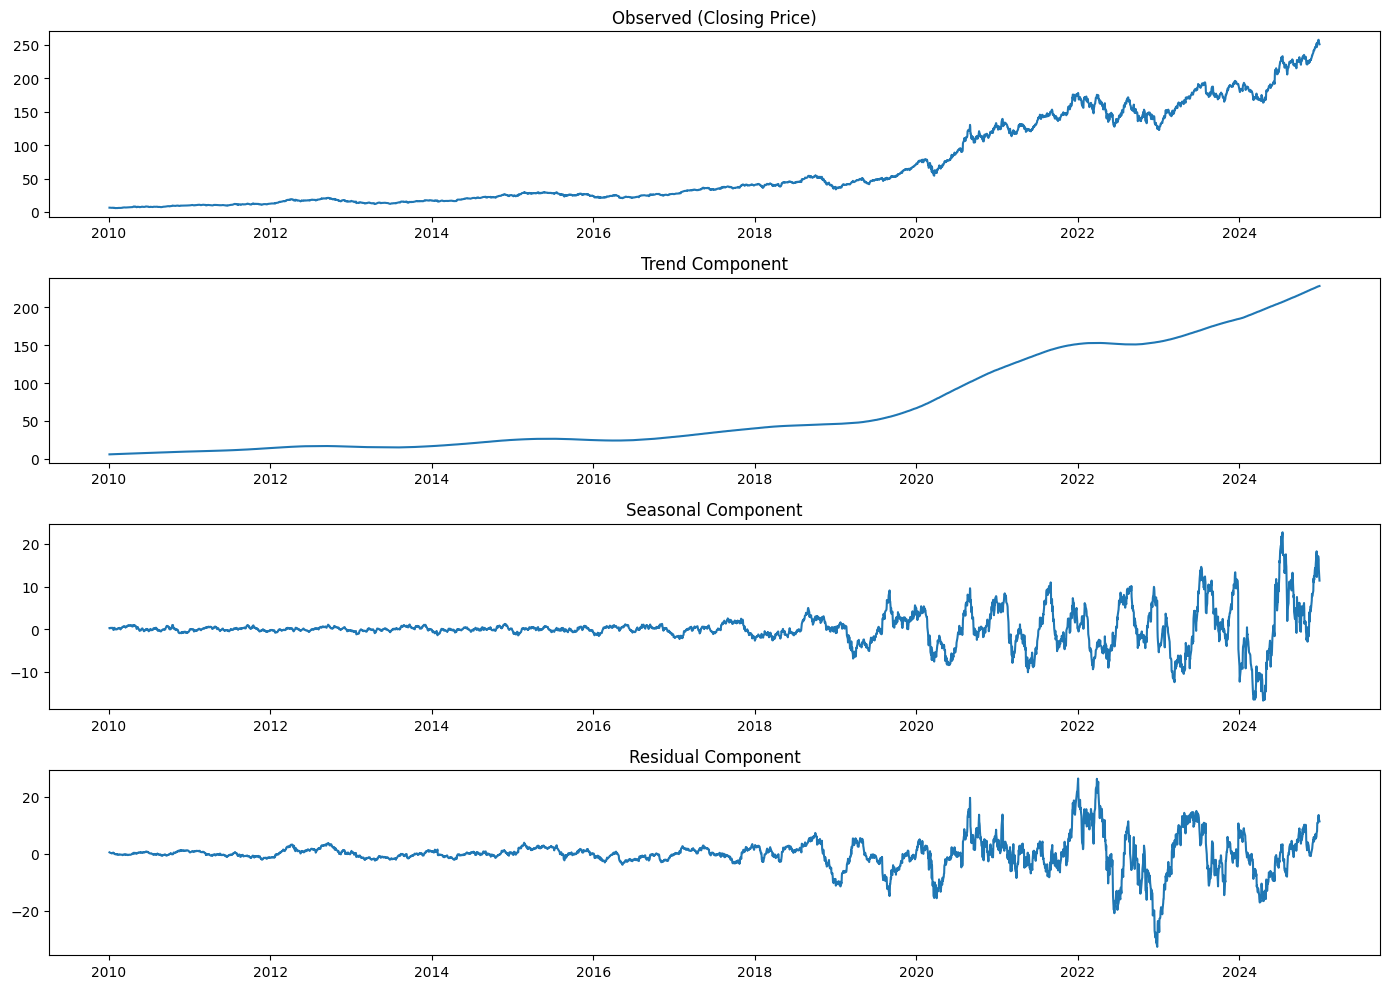

In [17]:
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title("Observed (Closing Price)")

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title("Trend Component")

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title("Seasonal Component")

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title("Residual Component")

plt.tight_layout()
plt.show()


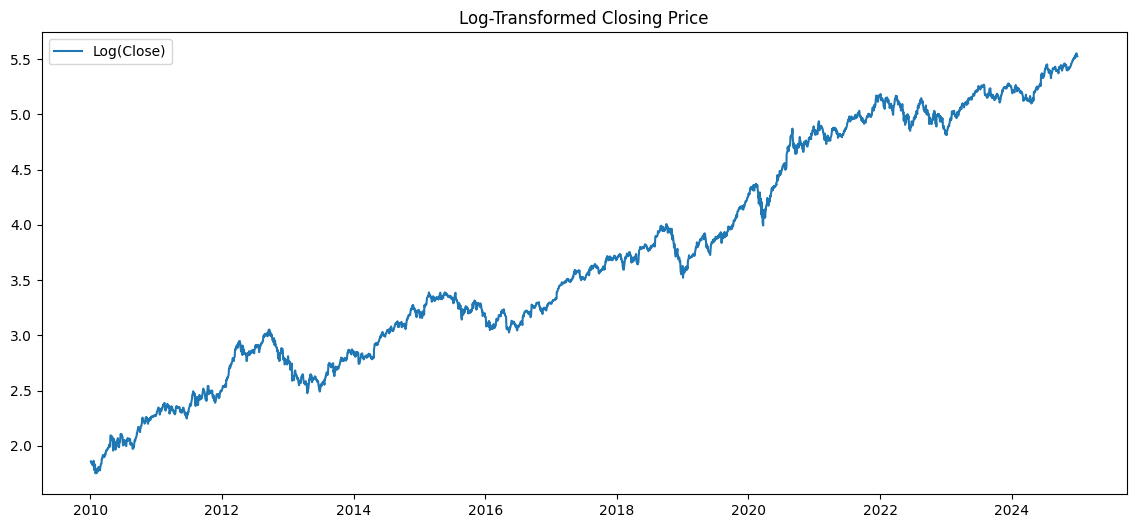

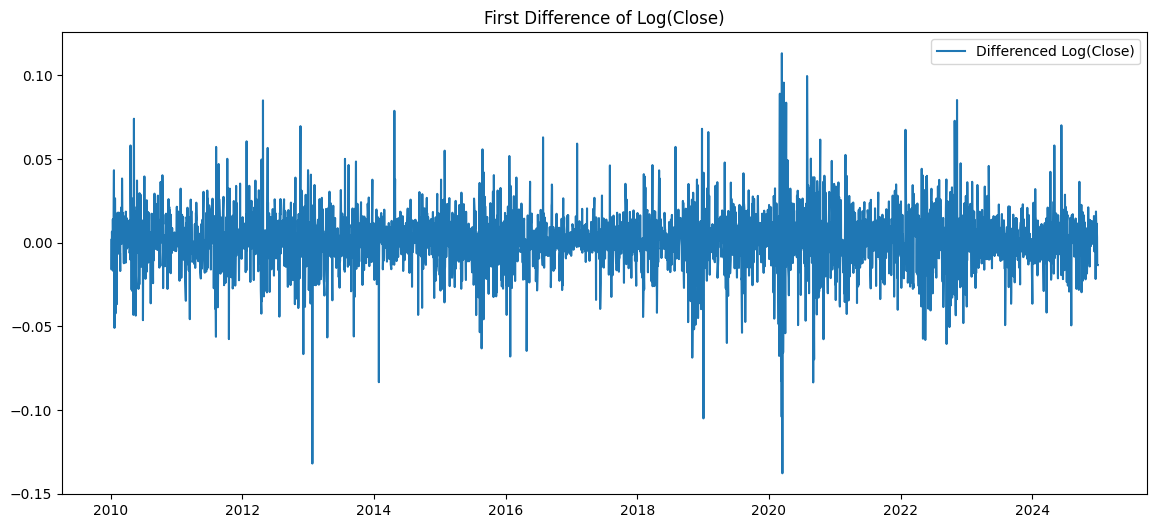

In [18]:
data['Log_Close'] = np.log(data['Close'])

data['Log_Close_Diff'] = data['Log_Close'].diff()

plt.figure(figsize=(14, 6))
plt.plot(data['Log_Close'], label='Log(Close)')
plt.title('Log-Transformed Closing Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(data['Log_Close_Diff'], label='Differenced Log(Close)')
plt.title('First Difference of Log(Close)')
plt.legend()
plt.show()


<Figure size 1400x500 with 0 Axes>

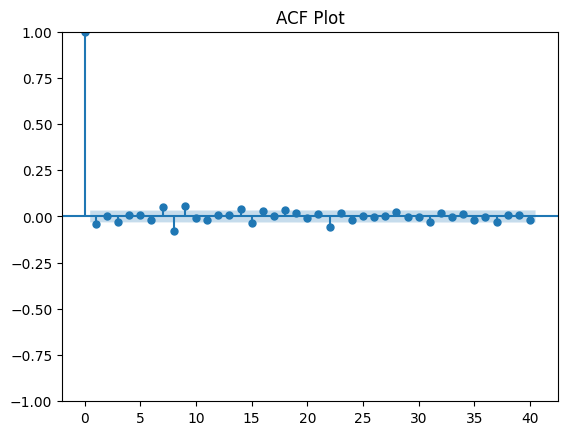

<Figure size 1400x500 with 0 Axes>

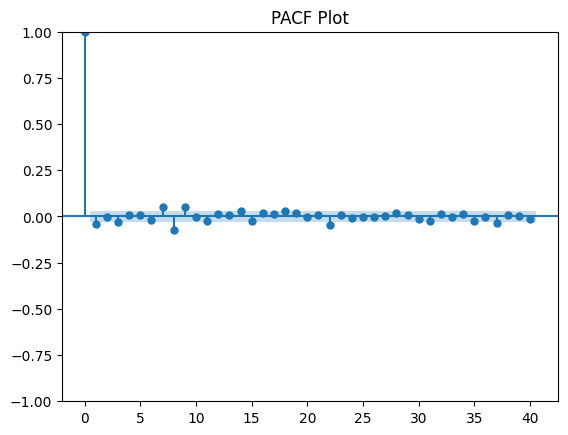

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = data['Log_Close_Diff'].dropna()

plt.figure(figsize=(14, 5))
plot_acf(series, lags=40)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(14, 5))
plot_pacf(series, lags=40)
plt.title('PACF Plot')
plt.show()


In [21]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(
    data['Log_Close'],
    order=(1, 1, 1)
)

model_fit = model.fit()

print(model_fit.summary())


/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 3773
Model:                 ARIMA(1, 1, 1)   Log Likelihood                9891.742
Date:                Mon, 22 Dec 2025   AIC                         -19777.484
Time:                        17:59:07   BIC                         -19758.778
Sample:                             0   HQIC                        -19770.833
                               - 3773                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1769      0.299     -0.591      0.555      -0.764       0.410
ma.L1          0.1416      0.303      0.468      0.640      -0.452       0.735
sigma2         0.0003   3.98e-06     77.531      0.0

/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


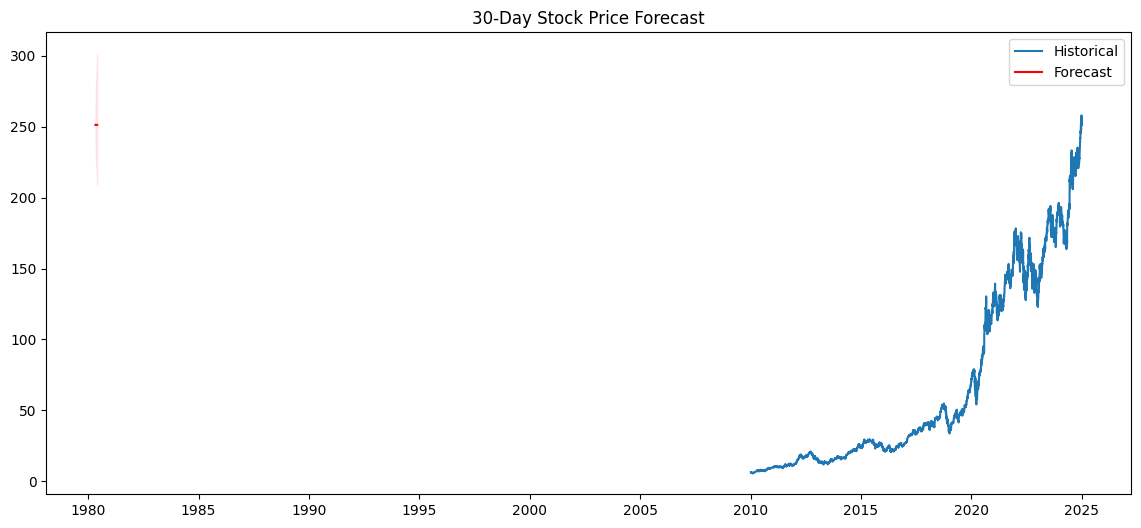

In [22]:
forecast_steps = 30

forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = np.exp(forecast.predicted_mean)
conf_int = np.exp(forecast.conf_int())

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Historical')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3
)
plt.title('30-Day Stock Price Forecast')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = data['Log_Close'][:-252]
test = data['Log_Close'][-252:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

pred = model_fit.forecast(steps=len(test))

# Back to original scale
pred = np.exp(pred)
test_actual = np.exp(test)

mae = mean_absolute_error(test_actual, pred)
rmse = np.sqrt(mean_squared_error(test_actual, pred))
mape = np.mean(np.abs((test_actual - pred) / test_actual)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rayan/py310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predic

MAE: 24.749962777593662
RMSE: 28.947467642134818
MAPE: nan


/tmp/ipykernel_11481/477382554.py:17: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((test_actual - pred) / test_actual)) * 100


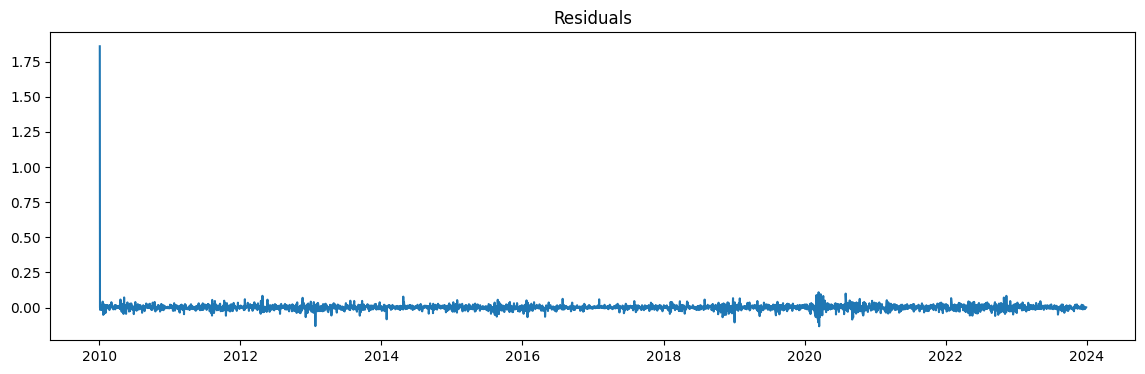

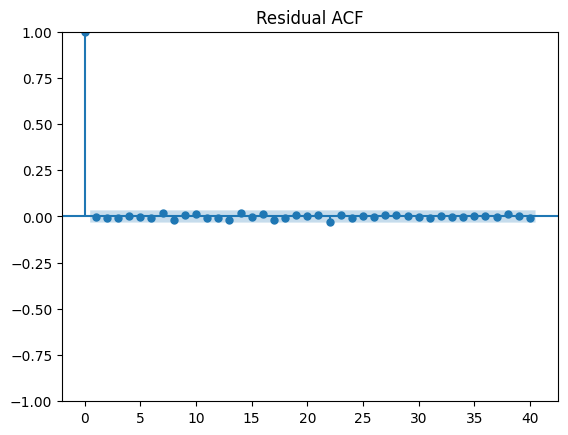

In [24]:
residuals = model_fit.resid

plt.figure(figsize=(14, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

plot_acf(residuals.dropna(), lags=40)
plt.title('Residual ACF')
plt.show()
